# Finding Non-Crossover Events

Sandbox for functions used in `viewer.py`

In [145]:
import matplotlib.pyplot as plt
from matplotlib.colors import CSS4_COLORS as colors
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle, Circle
import pandas as pd
import numpy as np

Zac's data files

In [146]:
# All SNPs -- takes a long time to load
# bsp_SNPs = pd.read_pickle('BSP_TIGER.marker_dataframe.pickle.gzip', compression='gzip')

In [147]:
# Interval file -- SNPs collapsed into blocks
bsp_intervals = pd.read_pickle('../BSP_TIGER.intervals_dataframe.pickle.gzip', compression='gzip')

In [148]:
# Crossover locations -- 1575 records
# bsp_COs = pd.read_pickle('bsp_COs_final_set.pickle.gzip', compression='gzip')

In [149]:
bsp_intervals.head()

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts
100999,BSP-OR-202,1,1,2820551,N2,BSP-OR-202-1,2820551,7310
101000,BSP-OR-202,1,2820551,2820595,transition,BSP-OR-202-1,44,2
101001,BSP-OR-202,1,2820595,2821506,CB4856,BSP-OR-202-1,912,27
101002,BSP-OR-202,1,2821506,2821610,transition,BSP-OR-202-1,104,2
101003,BSP-OR-202,1,2821610,8506388,N2,BSP-OR-202-1,5684779,4643


In [150]:
clist = sorted(bsp_intervals['sample'].unique())

In [151]:
clist[:10]

['BSP-OR-001',
 'BSP-OR-002',
 'BSP-OR-003',
 'BSP-OR-004',
 'BSP-OR-005',
 'BSP-OR-006',
 'BSP-OR-007',
 'BSP-OR-008',
 'BSP-OR-009',
 'BSP-OR-010']

In [152]:
len(clist)

610

Intervals in an interesting chromosome:

In [153]:
chrom = bsp_intervals[bsp_intervals.chrom_id == 'BSP-OR-001-4']

In [154]:
chrom

,sample,chromosome,start,stop,hmm_state,chrom_id,length,marker_counts
111,BSP-OR-001,4,1,1996956,CB4856,BSP-OR-001-4,1996956,2719
112,BSP-OR-001,4,1996956,1997145,transition,BSP-OR-001-4,189,2
113,BSP-OR-001,4,1997145,1997566,N2,BSP-OR-001-4,422,19
114,BSP-OR-001,4,1997566,1997578,transition,BSP-OR-001-4,12,2
115,BSP-OR-001,4,1997578,2156628,CB4856,BSP-OR-001-4,159051,348
...,...,...,...,...,...,...,...,...
169,BSP-OR-001,4,14548901,14549615,N2,BSP-OR-001-4,715,52
170,BSP-OR-001,4,14549615,14549671,transition,BSP-OR-001-4,56,2
171,BSP-OR-001,4,14549671,15669138,CB4856,BSP-OR-001-4,1119468,3022
172,BSP-OR-001,4,15669138,15672819,transition,BSP-OR-001-4,3681,2


In [155]:
# Our peak data
peaks = pd.read_csv('../peaks.csv')

In [156]:
peaks.head()

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
0,67168,BSP-OR-001,3,31010,unknown,N2,unknown,G,0,A,0,BSP-OR-001-3,0
1,67169,BSP-OR-001,3,31025,unknown,N2,unknown,C,0,T,0,BSP-OR-001-3,0
2,67170,BSP-OR-001,3,31030,N2,N2,N2,T,8,G,0,BSP-OR-001-3,0
3,67171,BSP-OR-001,3,31031,unknown,N2,N2,C,0,T,0,BSP-OR-001-3,0
4,67172,BSP-OR-001,3,31036,unknown,N2,N2,A,0,G,0,BSP-OR-001-3,0


In [157]:
peaks[(peaks.chrom_id == 'BSP-OR-001-4') & (peaks.blk_id == 0)]

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0
1984,93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0
1985,93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0


In [158]:
pks = peaks[peaks.chrom_id == 'BSP-OR-001-4']

In [159]:
def make_circles(df):
    pcolor = {
        'CB4856': 'cornflowerblue',
        'N2': 'indianred',
        'uCB4856': 'lightsteelblue',
        'uN2': 'lightpink',
        'unknown': 'lightgray',
        'het': 'palegoldenrod',
    }
    res = []
    rownum = 0
    for grp_id, grp in df.groupby('blk_id'):
        w = grp.iloc[-1].position - grp.iloc[0].position
        m =  grp.iloc[0].position + w/2
        x0 = m - 1250000
        rownum += 1
        for _, snp in grp.iterrows():
            p = (snp.position - grp.iloc[0].position) / w
            x = x0 + p*2500000
            res.append(Circle((x,-1000000*rownum),100000,color=pcolor[snp.base_geno]))
    return rownum, res

In [160]:
def make_patches(chrom):
    pcolor = {
        'CB4856': 'dodgerblue',
        'N2': 'indianred'
    }
    res = []
    for _, r in chrom.iterrows():
        c = pcolor.get(r.hmm_state) or 'lightgray'
        res.append(Rectangle((r.start,0), r.length, 500000, color=c))
        res.append(Circle((r.start,250000), 50000, color='black'))
    return res

In [161]:
def plot_intervals(chrom):
    rects = PatchCollection(make_patches(chrom), match_original=True)
    nrows, p = make_circles(pks)
    dots = PatchCollection(p, match_original=True)
    fig, ax = plt.subplots(figsize=(10,(nrows+1)/2))
    plt.box(False)
    plt.yticks([])
    plt.xticks(ticks=np.linspace(0,20000000,5), labels=[f'{int(n*20)}Mbp' for n in np.linspace(0,1,5)])
    ax.xaxis.set_ticks_position('top')
    ax.add_collection(rects)
    ax.add_collection(dots)
    plt.xlim(0,20000000)
    plt.ylim(-1000000*(nrows+1),2000000)


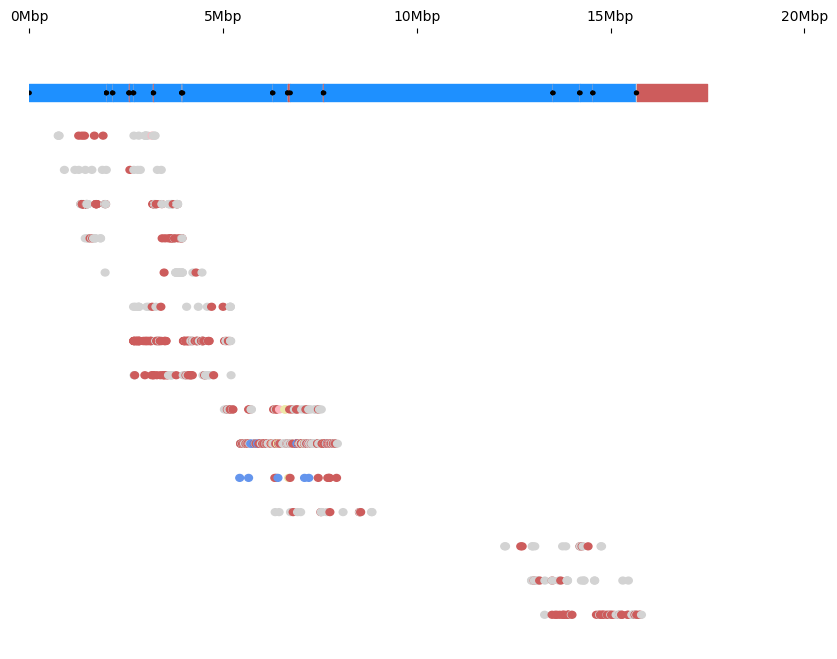

In [162]:
plot_intervals(chrom)

In [163]:
def dot_plots(df):
    pcolor = {
        'CB4856': 'cornflowerblue',
        'N2': 'indianred',
        'uCB4856': 'lightsteelblue',
        'uN2': 'lightpink',
        'unknown': 'lightgray',
        'het': 'palegoldenrod',
    }
    dotfigs = {}
    for grp_id, grp in df.groupby('blk_id'):
        if len(grp) == 0:
            continue
        fig, ax = plt.subplots(figsize=(10,0.8))
        plt.box(False)
        plt.xlim(0,10)
        plt.ylim(0,0.8)
        plt.yticks([])
        x0 = grp.iloc[0].position
        w = grp.iloc[-1].position - x0
        plt.xticks(ticks=np.linspace(0,10,5), labels=[f'{int(n*w)}bp' for n in np.linspace(0,1,5)])
        plt.suptitle(f'Block #{grp_id}\nStart: {(x0/1000000):.1f}Mbp\nSize: {len(grp)} SNPs\nLength: {w}bp', x=0, y=0.75, size='medium',ha='left')
        res = []
        for _, snp in grp.iterrows():
            p = (snp.position - x0) / w
            x = p*10
            res.append(Circle((x,0.2),0.1,color=pcolor[snp.base_geno]))
        dots = PatchCollection(res, match_original=True)
        ax.add_collection(dots)
        plt.close(fig)
        dotfigs[grp_id] = fig
    return dotfigs  

In [164]:
figs = dot_plots(pks)

In [165]:
len(figs)

15

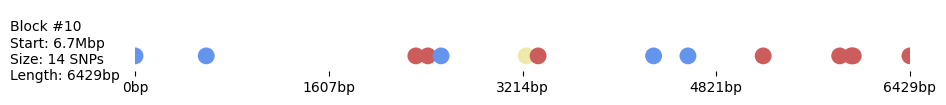

In [166]:
figs[10]

In [167]:
pks.head()

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0


In [168]:
np.arange(0,10,2.5)

array([0. , 2.5, 5. , 7.5])

In [169]:
np.linspace(0,1,5,endpoint=True)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [170]:
w = 526

In [171]:
[ f'{int(n*w)}bp' for n in np.linspace(0,1,5,endpoint=True)]

['0bp', '131bp', '263bp', '394bp', '526bp']

In [172]:
n = 3400000

In [173]:
f'{n:3.1f}'

'3400000.0'

In [174]:
p = True

In [175]:
p ^= 1

In [176]:
p

0

### Filters

In [177]:
blk = pks[pks.blk_id == 0]

In [178]:
blk

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0
1984,93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0
1985,93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0


In [179]:
s = set(blk.index)

In [180]:
pks[pks.index.isin(s)]

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0
1984,93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0
1985,93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0


In [181]:
len(blk)

19

In [182]:
blk[blk.base_geno == blk.hmm_state1].index

Index([1979, 1980, 1981, 1982, 1983], dtype='int64')

In [183]:
blk[(blk.ref_reads + blk.var_reads) > 0]

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0
1991,93082,BSP-OR-001,4,1997553,uN2,N2,N2,A,1,G,0,BSP-OR-001-4,0


In [184]:
blk

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0
1984,93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0
1985,93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0


In [185]:
blk.columns

Index(['Unnamed: 0', 'Sample', 'chromosome', 'position', 'base_geno',
       'hmm_state1', 'hmm_state2', 'reference', 'ref_reads', 'variant',
       'var_reads', 'chrom_id', 'blk_id'],
      dtype='object')

An empty frame with the same columns as the block frames:

In [186]:
pd.DataFrame(columns=blk.columns)

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id


In [187]:
data = np.random.randint(low=0, high=100, size=1000)

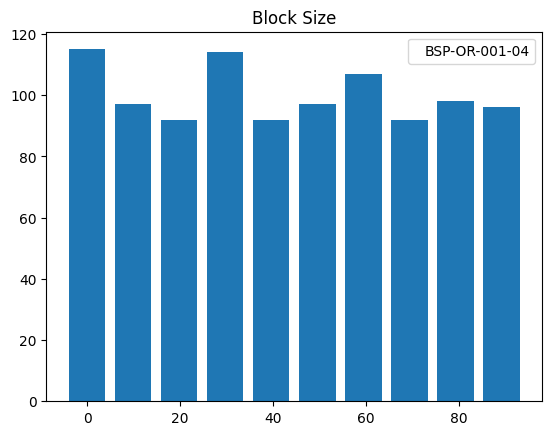

In [188]:
dct = plt.hist(data, bins=10, rwidth=0.8, align='left', label='BSP-OR-001-04')
plt.title('Block Size')
plt.legend(handlelength=0)

In [189]:
dct

(array([115.,  97.,  92., 114.,  92.,  97., 107.,  92.,  98.,  96.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

### Chromosome Lengths

In [190]:
for chr_id, chr in bsp_intervals.groupby('chromosome'):
    print(chr_id, chr.stop.max())

1 15114068
2 15311845
3 13819453
4 17493838
5 20953657
6 17739129


In [191]:
chr_length = {
    1: 15114068,
    2: 15311845,
    3: 13819453,
    4: 17493838,
    5: 20953657,
    6: 17739129,
}

In [192]:
blk.head()

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0


In [193]:
def relative_loc(i, chr):
    return i / chr_length[chr]

In [194]:
relative_loc(1997145, 4)

0.1141627697707044

In [195]:
blk.position.apply(relative_loc, args=(4,))

1976    0.114163
1977    0.114163
1978    0.114163
1979    0.114168
1980    0.114169
1981    0.114169
1982    0.114172
1983    0.114174
1984    0.114182
1985    0.114183
1986    0.114184
1987    0.114184
1988    0.114185
1989    0.114185
1990    0.114185
1991    0.114186
1992    0.114186
1993    0.114187
1994    0.114187
Name: position, dtype: float64

In [196]:
df = pd.DataFrame({
    'a': [1,2,3],
    'b': [1,2,3],
    'c': [1,2,3],
})

In [197]:
df

,a,b,c
0,1,1,1
1,2,2,2
2,3,3,3


In [198]:
sum(df.a,df.b)

0    7
1    8
2    9
Name: b, dtype: int64

In [199]:
sum([df[col] for col in df.columns])

0    3
1    6
2    9
dtype: int64

In [200]:
pks.head()

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0


In [201]:
len(peaks)

6446441

In [202]:
worm = peaks[peaks.Sample == 'BSP-OR-001']

In [203]:
len(worm)

15848

In [204]:
for chr_id, chr in worm.groupby('chromosome'):
    print(chr_id, len(chr))

3 1976
4 889
5 12983


In [205]:
data = []
for chr_id, chr in worm.groupby('chromosome'):
    data.extend(chr.position.apply(relative_loc, args=(chr_id,)))

In [206]:
len(data)

15848

In [207]:
data[:10]

[0.0022439383092804034,
 0.0022450237357440994,
 0.002245385544565331,
 0.0022454579063295775,
 0.0022458197151508097,
 0.0022460368004435485,
 0.002247194588671491,
 0.0022474840357284763,
 0.002247918206313955,
 0.0022482800151351866]

In [208]:
data[-10:]

[0.984524897014397,
 0.9845255651555239,
 0.9845287626880597,
 0.9845288104124259,
 0.9845289535855245,
 0.9845290013098906,
 0.9845292876560879,
 0.9845300512459472,
 0.9845304807652431,
 0.9845308148358065]

In [209]:
blk.iloc[0].chromosome

np.int64(4)

In [210]:
blk

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
1976,93067,BSP-OR-001,4,1997145,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1977,93068,BSP-OR-001,4,1997147,unknown,N2,unknown,T,0,C,0,BSP-OR-001-4,0
1978,93069,BSP-OR-001,4,1997149,unknown,N2,unknown,T,0,A,0,BSP-OR-001-4,0
1979,93070,BSP-OR-001,4,1997234,N2,N2,N2,G,6,A,0,BSP-OR-001-4,0
1980,93071,BSP-OR-001,4,1997248,N2,N2,N2,T,8,A,0,BSP-OR-001-4,0
1981,93072,BSP-OR-001,4,1997259,N2,N2,N2,T,8,C,0,BSP-OR-001-4,0
1982,93073,BSP-OR-001,4,1997302,N2,N2,N2,C,9,T,0,BSP-OR-001-4,0
1983,93074,BSP-OR-001,4,1997340,N2,N2,N2,C,7,T,0,BSP-OR-001-4,0
1984,93075,BSP-OR-001,4,1997474,unknown,N2,N2,T,0,A,0,BSP-OR-001-4,0
1985,93076,BSP-OR-001,4,1997495,unknown,N2,N2,T,0,C,0,BSP-OR-001-4,0


In [211]:
blk.iloc[-1].position - blk.iloc[0].position

np.int64(421)

In [212]:
np.empty(10)

array([ 9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ])

In [213]:
top = 77000

In [214]:
chunksize = 10000

In [215]:
for i in range(top//chunksize+1):
    print(i*chunksize, min(top,(i+1)*chunksize))

0 10000
10000 20000
20000 30000
30000 40000
40000 50000
50000 60000
60000 70000
70000 77000


In [216]:
len(peaks)

6446441

In [217]:
!ls

ncos.ipynb  peaks.ipynb xo.ipynb


In [218]:
def load_data(fn):
    df = pd.read_csv(fn)
    res = []
    groups = df.groupby('chrom_id')
    for chr_id, chr in groups:
        for blk_id, blk in chr.groupby('blk_id'):
            res.append(blk)
    return res

In [219]:
blocks = load_data('../peaks.csv')

In [220]:
len(blocks)

76975

In [221]:
data = [len(b) for b in blocks]

In [222]:
len(data)

76975

In [223]:
import os

In [224]:
os.cpu_count()

12

In [225]:
df = blocks[4]

In [226]:
s = {160, 161, 162, 163, 164, 165, 166, 167, 168, 169}

In [227]:
df[df.index.isin(s)]

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
160,68076,BSP-OR-001,3,88644,unknown,N2,N2,A,0,C,0,BSP-OR-001-3,4
161,68077,BSP-OR-001,3,88646,unknown,N2,N2,A,0,C,0,BSP-OR-001-3,4
162,68078,BSP-OR-001,3,88740,unknown,N2,N2,C,0,G,0,BSP-OR-001-3,4
163,68079,BSP-OR-001,3,88741,unknown,N2,N2,C,0,A,0,BSP-OR-001-3,4
164,68080,BSP-OR-001,3,88785,unknown,N2,N2,A,0,G,0,BSP-OR-001-3,4
165,68081,BSP-OR-001,3,88786,unknown,N2,N2,T,0,A,0,BSP-OR-001-3,4
166,68082,BSP-OR-001,3,88830,N2,N2,N2,C,4,G,0,BSP-OR-001-3,4
167,68083,BSP-OR-001,3,88850,N2,N2,N2,G,4,C,0,BSP-OR-001-3,4
168,68084,BSP-OR-001,3,88851,unknown,N2,N2,C,0,G,0,BSP-OR-001-3,4
169,68085,BSP-OR-001,3,88854,N2,N2,N2,G,4,A,0,BSP-OR-001-3,4


In [228]:
df[df.index.isin(s) & (df.base_geno == df.hmm_state1)]

,Unnamed: 0,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
166,68082,BSP-OR-001,3,88830,N2,N2,N2,C,4,G,0,BSP-OR-001-3,4
167,68083,BSP-OR-001,3,88850,N2,N2,N2,G,4,C,0,BSP-OR-001-3,4
169,68085,BSP-OR-001,3,88854,N2,N2,N2,G,4,A,0,BSP-OR-001-3,4


In [229]:
s2 = set(s)

In [230]:
s2 &= set(df[df.index.isin(s) & (df.base_geno == df.hmm_state1)].index)

In [231]:
s2

{166, 167, 169}

### Full Frame Filtering

In [2]:
import pandas as pd

In [3]:
flat = pd.read_csv('../peaks.csv')

In [4]:
len(flat)

6446441

In [8]:
flat.rename(columns={'Unnamed: 0': 'SNP'}, inplace=True)

In [9]:
flat.head()

,SNP,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
0,67168,BSP-OR-001,3,31010,unknown,N2,unknown,G,0,A,0,BSP-OR-001-3,0
1,67169,BSP-OR-001,3,31025,unknown,N2,unknown,C,0,T,0,BSP-OR-001-3,0
2,67170,BSP-OR-001,3,31030,N2,N2,N2,T,8,G,0,BSP-OR-001-3,0
3,67171,BSP-OR-001,3,31031,unknown,N2,N2,C,0,T,0,BSP-OR-001-3,0
4,67172,BSP-OR-001,3,31036,unknown,N2,N2,A,0,G,0,BSP-OR-001-3,0


In [12]:
groups = flat.groupby(['chrom_id','blk_id'])

In [18]:
groups.size()

chrom_id      blk_id
BSP-OR-001-3  0         17
              1         15
              2         23
              3         90
              4         49
                        ..
BSP-SR-309-5  80        31
              81        16
              82        15
              83        64
              84        20
Length: 76975, dtype: int64

In [20]:
(groups.size() >= 10) & (groups.size() <= 20)

chrom_id      blk_id
BSP-OR-001-3  0          True
              1          True
              2         False
              3         False
              4         False
                        ...  
BSP-SR-309-5  80        False
              81         True
              82         True
              83        False
              84         True
Length: 76975, dtype: bool

In [21]:
groups.max('position') - groups.min('position')

SNP  chromosome  position  ref_reads  var_reads
chrom_id     blk_id                                                 
BSP-OR-001-3 0        16           0       175          8          0
             1        14           0      3189          9          0
             2        22           0       519         16          0
             3        89           0      3117         24          8
             4        48           0      1271         13          7
...                  ...         ...       ...        ...        ...
BSP-SR-309-5 80       30           0       500         24          0
             81       15           0       202         82          0
             82       14           0       343         29          0
             83       63           0      1204         69          0
             84       19           0       519         23          0

[76975 rows x 5 columns]

In [22]:
lengths = (groups.max('position') - groups.min('position')).position

In [23]:
lengths

chrom_id      blk_id
BSP-OR-001-3  0          175
              1         3189
              2          519
              3         3117
              4         1271
                        ... 
BSP-SR-309-5  80         500
              81         202
              82         343
              83        1204
              84         519
Name: position, Length: 76975, dtype: int64

In [24]:
lengths > 1000

chrom_id      blk_id
BSP-OR-001-3  0         False
              1          True
              2         False
              3          True
              4          True
                        ...  
BSP-SR-309-5  80        False
              81        False
              82        False
              83         True
              84        False
Name: position, Length: 76975, dtype: bool

In [31]:
groups.get_group(('BSP-OR-001-3',0))

,SNP,Sample,chromosome,position,base_geno,hmm_state1,hmm_state2,reference,ref_reads,variant,var_reads,chrom_id,blk_id
0,67168,BSP-OR-001,3,31010,unknown,N2,unknown,G,0,A,0,BSP-OR-001-3,0
1,67169,BSP-OR-001,3,31025,unknown,N2,unknown,C,0,T,0,BSP-OR-001-3,0
2,67170,BSP-OR-001,3,31030,N2,N2,N2,T,8,G,0,BSP-OR-001-3,0
3,67171,BSP-OR-001,3,31031,unknown,N2,N2,C,0,T,0,BSP-OR-001-3,0
4,67172,BSP-OR-001,3,31036,unknown,N2,N2,A,0,G,0,BSP-OR-001-3,0
5,67173,BSP-OR-001,3,31039,unknown,N2,N2,A,0,T,0,BSP-OR-001-3,0
6,67174,BSP-OR-001,3,31055,unknown,N2,N2,A,0,T,0,BSP-OR-001-3,0
7,67175,BSP-OR-001,3,31059,unknown,N2,N2,T,0,A,0,BSP-OR-001-3,0
8,67176,BSP-OR-001,3,31065,N2,N2,N2,A,8,T,0,BSP-OR-001-3,0
9,67177,BSP-OR-001,3,31070,N2,N2,N2,C,8,T,0,BSP-OR-001-3,0


In [38]:
groups.max('position')

SNP  chromosome  position  ref_reads  var_reads
chrom_id     blk_id                                                    
BSP-OR-001-3 0        67184           3     31185          8          0
             1        67518           3     58891          9          0
             2        67667           3     68747         16          0
             3        67924           3     81820         24          8
             4        68109           3     89768         13          7
...                     ...         ...       ...        ...        ...
BSP-SR-309-5 80      190387           5  20159657         24          0
             81      191354           5  20221557         82          0
             82      191895           5  20243954         29          0
             83      192372           5  20258993         69          0
             84      194449           5  20613413         23          0

[76975 rows x 5 columns]

In [59]:
groups.min('position').position.rename('start')

chrom_id      blk_id
BSP-OR-001-3  0            31010
              1            55702
              2            68228
              3            78703
              4            88497
                          ...   
BSP-SR-309-5  80        20159157
              81        20221355
              82        20243611
              83        20257789
              84        20612894
Name: start, Length: 76975, dtype: int64

In [61]:
pd.concat([
    groups.min('position').position.rename('start'), 
    groups.max('position').position.rename('end'), 
    groups.size().rename('count')], 
    axis=1
)

start       end  count
chrom_id     blk_id                           
BSP-OR-001-3 0          31010     31185     17
             1          55702     58891     15
             2          68228     68747     23
             3          78703     81820     90
             4          88497     89768     49
...                       ...       ...    ...
BSP-SR-309-5 80      20159157  20159657     31
             81      20221355  20221557     16
             82      20243611  20243954     15
             83      20257789  20258993     64
             84      20612894  20613413     20

[76975 rows x 3 columns]

In [72]:
data = pd.concat(
    [
        groups.size().rename('blk_size'), 
        (groups.max('position') - groups.min('position')).position.rename('blk_len'), 
        (groups.max('position') + groups.min('position')/2).position.rename('blk_loc'), 
    ],
    axis=1
)

In [73]:
data

blk_size  blk_len     blk_loc
chrom_id     blk_id                               
BSP-OR-001-3 0             17      175     46690.0
             1             15     3189     86742.0
             2             23      519    102861.0
             3             90     3117    121171.5
             4             49     1271    134016.5
...                       ...      ...         ...
BSP-SR-309-5 80            31      500  30239235.5
             81            16      202  30332234.5
             82            15      343  30365759.5
             83            64     1204  30387887.5
             84            20      519  30919860.0

[76975 rows x 3 columns]

In [75]:
data[data.blk_size > 25]

blk_size  blk_len     blk_loc
chrom_id     blk_id                               
BSP-OR-001-3 3             90     3117    121171.5
             4             49     1271    134016.5
             5             57     6161    183639.5
             6             56     1642    237148.0
             8             58     2711   1416110.0
...                       ...      ...         ...
BSP-SR-309-5 75            55      972  29253151.5
             76            51     2378  29258718.5
             78            39      993  29279650.5
             80            31      500  30239235.5
             83            64     1204  30387887.5

[54766 rows x 3 columns]

In [79]:
data[(data.blk_size < 50) & (data.blk_len > 10000)]

blk_size  blk_len     blk_loc
chrom_id     blk_id                               
BSP-OR-001-3 7             24    10663    494072.5
             26            31    16716  19671741.0
BSP-OR-001-5 13            24    10291   5141102.5
             83            29    10984  26118791.5
             100           40    19148  28108076.0
...                       ...      ...         ...
BSP-SR-307-5 26            40    20898  28109955.0
BSP-SR-309-2 16            40    29546   2805092.0
             42            40    16136  14758145.0
BSP-SR-309-5 57            33    13588  26253727.0
             68            38    16632  28105689.0

[1986 rows x 3 columns]